In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
import xarray as xr
import pandas as pd

In [4]:
diff = xr.open_dataset("I80diffs.nc")

In [5]:
diff

<xarray.Dataset>
Dimensions:    (Abs_PM: 164, day: 21, minute: 288)
Coordinates:
  * minute     (minute) int32 0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 ...
  * Abs_PM     (Abs_PM) float64 3.3 4.48 4.59 4.7 4.8 4.91 5.09 5.19 5.28 ...
  * day        (day) |S14 b'2016_04_01.csv' b'2016_04_04.csv' ...
Data variables:
    occupancy  (day, minute, Abs_PM) float64 0.0026 0.0031 0.002 0.0023 ...

In [6]:
d = diff['occupancy']

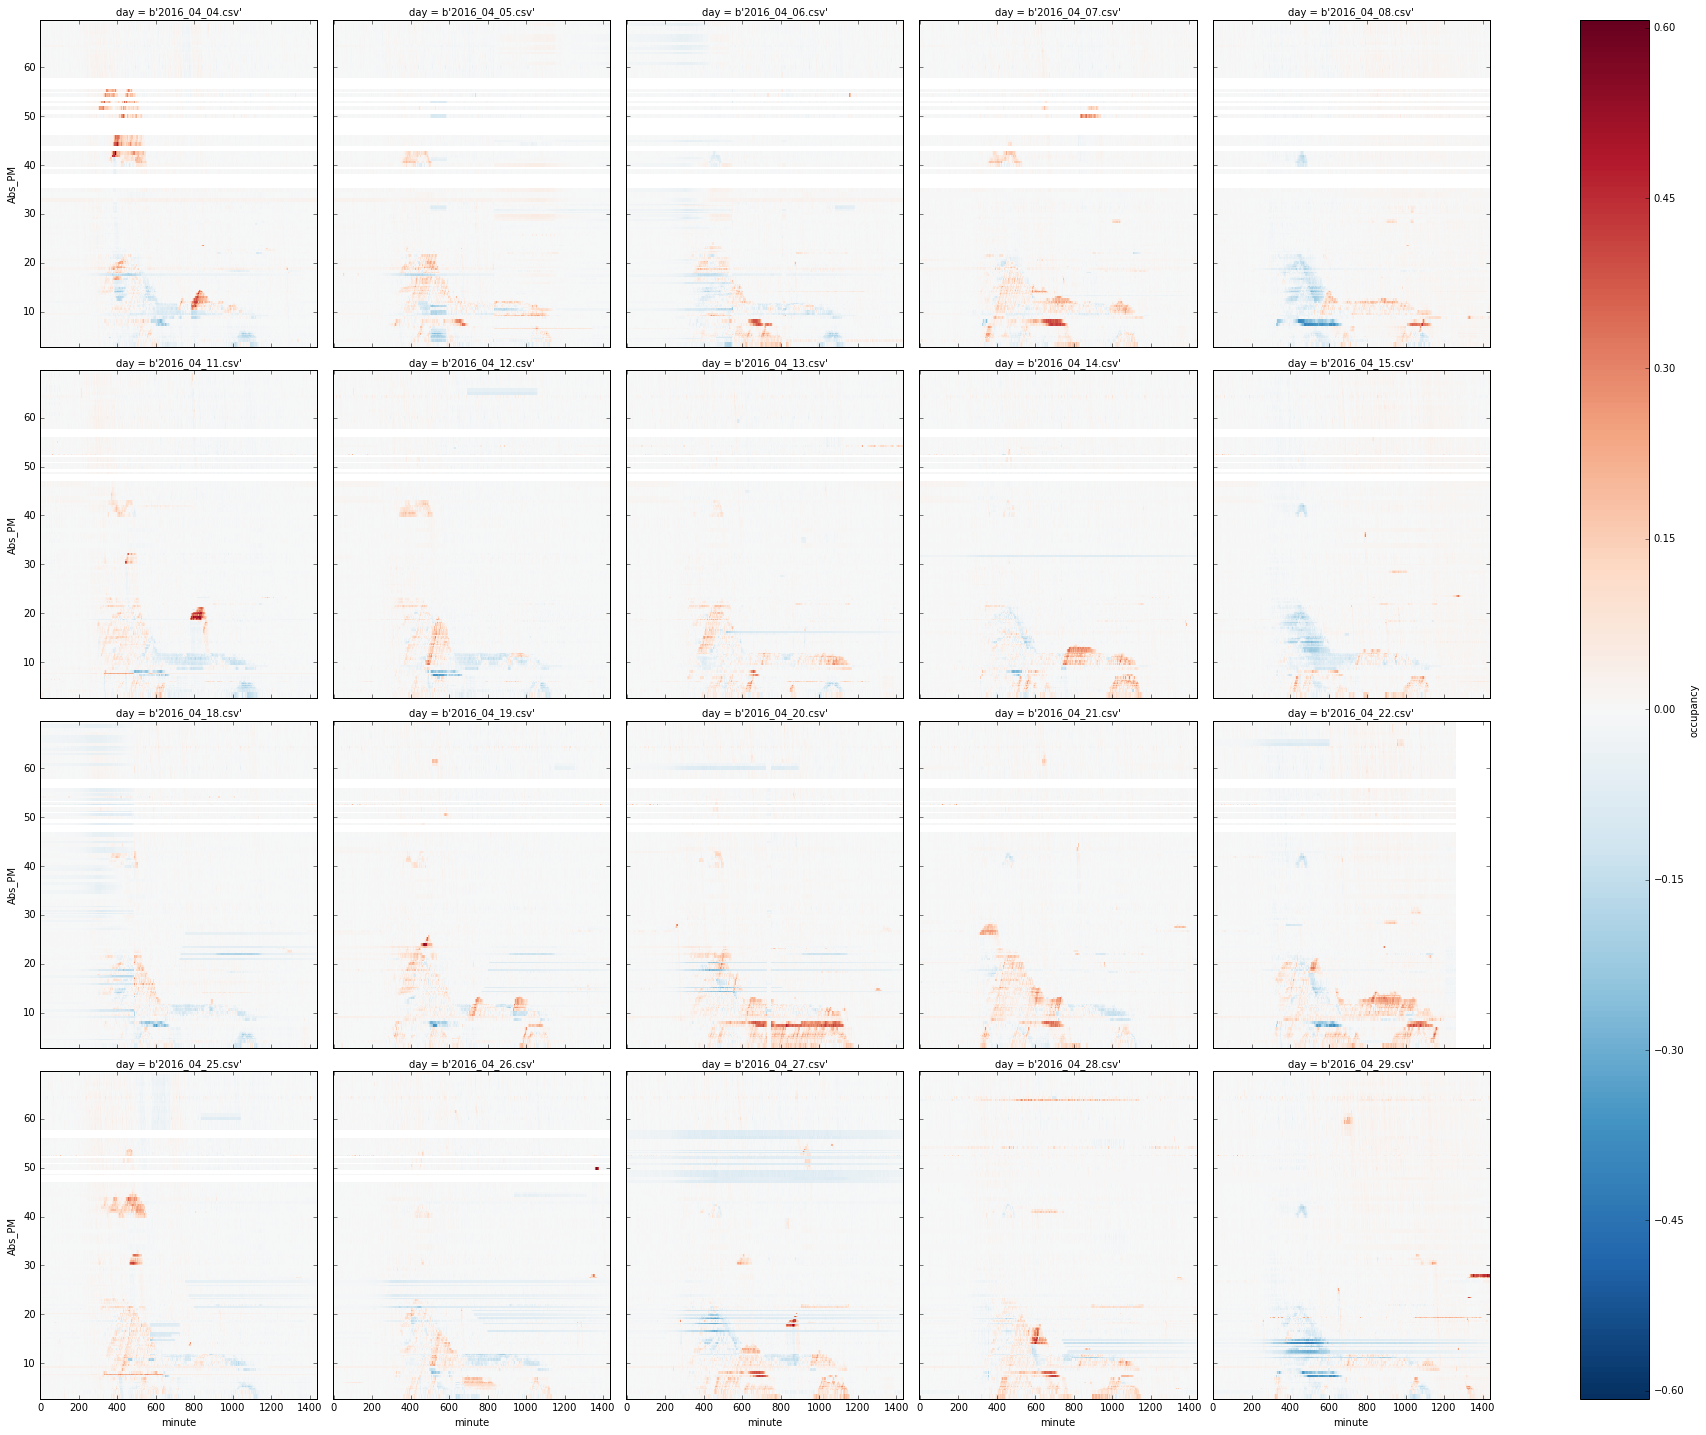

In [11]:
# Drop the first day to make a plot aligned on weekdays
d[1:, :, :].plot.pcolormesh(x = "minute", y = "Abs_PM",
                            col = "day", col_wrap = 5, size = 5, aspect = 1)

plt.savefig("diffs.png")

The 29th looks like some interesting things happened. Let's plot the corresponding incidents on the density.

In [19]:
chp = pd.read_csv("chp_incidents_80W.csv")

In [24]:
chp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,collision,weekday,bizday,onoff
0,16340049,GGHB,160401,04/01/2016 07:30:00,1179-Trfc Collision-1141 Enrt,I80 W / W Texas St Onr,Solano FSP,NaN,NaN,38.247868,...,80,W,17.004,44.5,NaN,4.0,True,Friday,True,True
1,16340050,GGHB,160401,04/01/2016 07:29:00,1179-Trfc Collision-1141 Enrt,I80 W / W Texas St Onr,Solano,NaN,NaN,38.247868,...,80,W,17.004,44.5,NaN,12.0,True,Friday,True,True
2,16340094,GGHB,160401,04/01/2016 07:57:00,1183-Trfc Collision-Unkn Inj,I80 W / N Meridian Rd Ofr,Solano FSP,NaN,NaN,38.404904,...,80,W,31.52,59.0,NaN,16.0,True,Friday,True,True
3,16340095,GGHB,160401,04/01/2016 07:55:00,1183-Trfc Collision-Unkn Inj,I80 W / N Meridian Rd Ofr,Solano,NaN,NaN,38.404904,...,80,W,31.52,59.0,NaN,2.0,True,Friday,True,True
4,16340125,GGHB,160401,04/01/2016 08:09:00,1182-Trfc Collision-No Inj,I80 W / Tp,San Francisco,NaN,NaN,37.824289,...,80,W,1.99,7.3,NaN,20.0,True,Friday,True,False


In [31]:
dt = chp.iloc[:, 3].str.extract("([0-9]{2}/[0-9]{2})/")
dt.head()

/home/clark/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


0    04/01
1    04/01
2    04/01
3    04/01
4    04/01
Name: V4, dtype: object

In [37]:
dt_pick = dt == "04/29"
dt_pick.sum()

2

In [38]:
rows = chp[dt_pick]
rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,collision,weekday,bizday,onoff
188,16397285,GGHB,160429,04/29/2016 16:40:00,1182-Trfc Collision-No Inj,I80 W / Fremont St Ofr,San Francisco,NaN,NaN,37.786990,...,80,W,5.74,2.2,NaN,19.0,True,Friday,True,True
189,16397551,GGHB,160429,04/29/2016 18:36:00,1183-Trfc Collision-Unkn Inj,I80 W / Magazine St Ofr,Solano,NaN,NaN,38.085969,...,80,W,1.815,29.3,NaN,44.0,True,Friday,True,True


The 17th index is absolute postmile

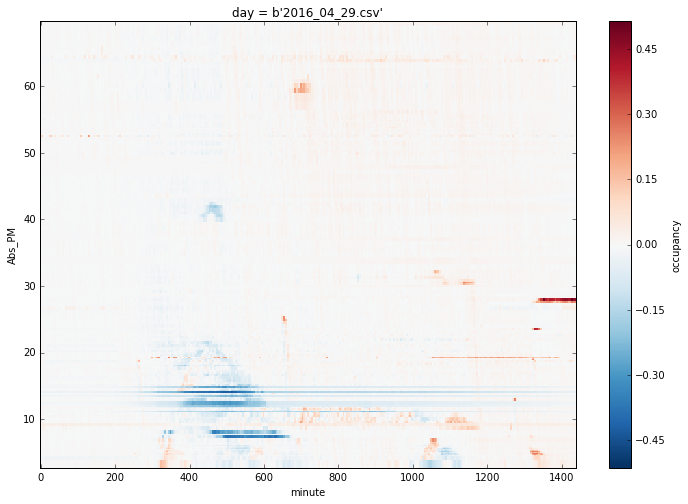

In [40]:
d29 = d.sel(day = b"2016_04_29.csv")
plt.figure(figsize = (12, 8))
d29.plot(x = "minute", y = "Abs_PM")